# ANOVA

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
diamonds = sns.load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [11]:
diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [12]:
diamonds['price'].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

In [13]:
#Log(price):
diamonds['log_price'] = np.log(diamonds['price'])

In [17]:
diamonds = diamonds[['color', "price", "log_price"]].dropna().reset_index(drop =True)
diamonds

,color,price,log_price
0,E,326,5.786897
1,E,326,5.786897
2,E,327,5.789960
3,I,334,5.811141
4,J,335,5.814131
...,...,...,...
53935,D,2757,7.921898
53936,D,2757,7.921898
53937,D,2757,7.921898
53938,H,2757,7.921898


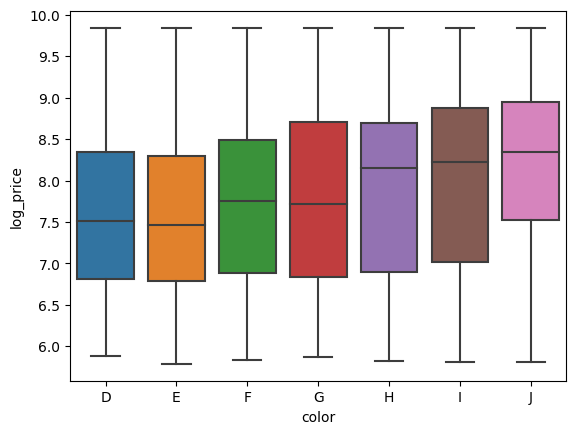

In [20]:
sns.boxplot(data = diamonds, x='color', y = 'log_price');

There seems to be some variation in the log of the price, but it's not clear if there is a difference based on color grade. So let's test it out using a **one-way ANOVA**.

## 1) One-Way ANOVA

In [23]:
diamonds['color'].unique()

['E', 'I', 'J', 'H', 'F', 'G', 'D']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']

### Building the Model

In [30]:
import statsmodels.formula.api as smf

In [31]:
# Creating a regression model using the OLS function, and then fitting the model into the data :
# 'color' is a categorical variable hence C(color):
ols_data = diamonds
ols_formula = "log_price ~ C(color)"
OLS = smf.ols(formula=ols_formula, data = ols_data)

model = OLS.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     237.8
Date:                Wed, 20 Dec 2023   Prob (F-statistic):          3.77e-301
Time:                        20:04:43   Log-Likelihood:                -76617.
No. Observations:               53940   AIC:                         1.532e+05
Df Residuals:                   53933   BIC:                         1.533e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.6169      0.012    625.984      0.000       7.593       7.641
C(color)[T.E]    -0.0375      0.016     -2.370      0.018      -0.069      -0.006
C(color)[T.F]     0.1455      0.016      9.146      0.000       0.114       0.177
C(color)[T.G]     0.1727      0.015     11.219      0.000       0.143       0.203
C(color)[T.H]     0.3015      0.016     18.390      0.000       0.269       0.334
C(color)[T.I]     0.4061      0.018     22.250      0.000       0.370       0.442
C(color)[T.J]     0.5291      0.022     23.537      0.000       0.485       0.573
==============================================================================
Omnibus:                    11794.122   Durbin-Watson:                   0.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2240.596
Skew:                           0.064   Prob(JB):                         0.00
Kurtosis:                       2.010   Cond. No.                         8.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Remarque** : Couleur de base est : D

In [32]:
import statsmodels.api as sm

In [33]:
sm.stats.anova_lm(model, typ = 2)

,sum_sq,df,F,PR(>F)
C(color),1431.255783,6.0,237.807767,3.767555e-301
Residual,54099.661516,53933.0,NaN,NaN


The **p-values** are smaller than 0.05, so the results are statistically significant, and therefore we can reject the Null Hypothesis **$H^0$** which is that the mean price is the same across all the diamond colors.

Now that we have significant results from anova test, we can run **Tukey's HSD** post hoc test.

### Anova Post hoc test

In [49]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [50]:
# Run the test endog=Y groups=X :
turkey_oneway = pairwise_tukeyhsd(endog = diamonds['log_price'], groups = diamonds['color'], alpha = 0.05)

In [51]:
turkey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
D,E,-0.0375,0.2115,-0.0842,0.0092,False
D,F,0.1455,0.0,0.0986,0.1924,True
D,G,0.1727,0.0,0.1273,0.2181,True
D,H,0.3015,0.0,0.2532,0.3499,True
D,I,0.4061,0.0,0.3522,0.4599,True
D,J,0.5291,0.0,0.4628,0.5953,True
E,F,0.183,0.0,0.1406,0.2255,True
E,G,0.2102,0.0,0.1694,0.251,True
E,H,0.339,0.0,0.295,0.3831,True
E,I,0.4436,0.0,0.3936,0.4935,True


## 2) Two-Way ANOVA

In [38]:
diamonds = sns.load_dataset("diamonds")
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [39]:
diamonds['cut'].unique()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [40]:
diamonds['log_price'] = np.log(diamonds['price'])
diamonds = diamonds[['color', 'cut', 'log_price']].dropna().reset_index(drop=True)
diamonds.head(5)

,color,cut,log_price
0,E,Ideal,5.786897
1,E,Premium,5.786897
2,E,Good,5.789960
3,I,Premium,5.811141
4,J,Good,5.814131


### Building the Model


In [43]:
import statsmodels.formula.api as smf

In [44]:
ols_data = diamonds
ols_formula = "log_price ~ C(color) + C(cut)"
OLS = smf.ols(formula = ols_formula, data= ols_data)
model = OLS.fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     236.5
Date:                Wed, 20 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:12:33   Log-Likelihood:                -76164.
No. Observations:               53940   AIC:                         1.523e+05
Df Residuals:                   53929   BIC:                         1.524e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               7.4827      0.013    571.353      0.000       7.457       7.508
C(color)[T.E]          -0.0405      0.016     -2.577      0.010      -0.071      -0.010
C(color)[T.F]           0.1396      0.016      8.843      0.000       0.109       0.170
C(color)[T.G]           0.1716      0.015     11.240      0.000       0.142       0.202
C(color)[T.H]           0.2854      0.016     17.538      0.000       0.253       0.317
C(color)[T.I]           0.3951      0.018     21.829      0.000       0.360       0.431
C(color)[T.J]           0.5011      0.022     22.459      0.000       0.457       0.545
C(cut)[T.Premium]       0.2959      0.011     27.290      0.000       0.275       0.317
C(cut)[T.Very Good]     0.1558      0.011     13.790      0.000       0.134       0.178
C(cut)[T.Good]          0.1973      0.016     12.546      0.000       0.166       0.228
C(cut)[T.Fair]          0.4222      0.026     16.440      0.000       0.372       0.473
==============================================================================
Omnibus:                     8938.102   Durbin-Watson:                   0.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2012.667
Skew:                           0.068   Prob(JB):                         0.00
Kurtosis:                       2.064   Cond. No.                         9.05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
import statsmodels.api as sm

In [48]:
sm.stats.anova_lm(model, typ = 2)

,sum_sq,df,F,PR(>F)
C(color),1325.991186,6.0,224.036379,1.044711e-283
C(cut),901.918331,4.0,228.579028,5.980890e-195
Residual,53197.743185,53929.0,NaN,NaN


Since the **p-value** is small in all 3, we can reject all 3 Null Hypotheses.

**TWO-way ANOVA results** :
* Logarithm of price is **NOT** the same for different colors
* Logarithm of the price is **NOT** the same for different diamond cuts
* There is an interaction effect between the color and cut that impacts the price of the diamond